<font size ="8"> <div align="center">**Sales Prediction from Linearized Models of Advertisement Data**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----------------------------
# **Context of the Exercise (Sales Prediction)**
-----------------------------

<p align = "justify">
One interesting application of Machine Learning (Regression) is quantitatively determining the effect of advertisement efforts of a company on its sales. In this case study, Data on the advertisement efforts of a particular company is given in terms of budgets allocated for each advertisement platform.

<p align = "justify">
Concepts of linear regression will be employed to train predictive models for Sales using Advertisement Data. Statistical parameters of models may also provide useful insight on which form of advertisement has the most significant impacts on sales.

-----------------------------
## **Data Description**
-----------------------------
The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- **TV**    - Independent variable quantifying budget for TV ads
- **Radio** - Independent variable quantifying budget for radio ads
- **News**  - Independent variable quantifying budget for news ads
- **Sales** - Dependent/Target variable

-----------------------------
## **Objectives of the Study**
-----------------------------
<p align = "justify"> The main objective of this study is to demonstrate the method of Linear Regression for predicting a Targeted feature. Using the Advertisemet Dataset, linear models will be created for predicting `Sales`. In addition to model training, the concepts of Model performance evaluation and Model Regularization will be explored using the given dataset.

### **Importing the necessary libraries and Dataset Overview**

**Importing Libraries**

In [ ]:
# Importing packages

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn import linear_model

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Mounting Google Drive and Reading the Data**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Redaing the CSV file
Ad_df =pd.read_csv('/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/4 Supervised Learning - Regression and Prediction/0 Lecture Materials/Dataset - Advertising.csv')

**Quick Look at the Dataset**

In [ ]:
# Printing out the first 5 rows of the dataset
Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Dropping the first column as it is just the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
# Generating a summary of the Dataset
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### **Training Linear Regression Models**

#### **Simple linear regression**

**Creating Linear Models relating to target variable `sales`, one feature at a time**

In [ ]:
# Taking out all the variables as numpy arrays.
Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)
TV = Ad_df.TV.values.reshape(len(Ad_df['Sales']), 1)
Radio = Ad_df.Radio.values.reshape(len(Ad_df['Sales']), 1)
Newspaper = Ad_df.Newspaper.values.reshape(len(Ad_df['Sales']), 1)

In [ ]:
# Training Linear Models

# Fitting a simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

# Fitting a simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# Fitting a simple linear regression model with the Newspaper feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

In [ ]:
# Storing the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


**Evualuating the Models' Goodness of Fit**

In [ ]:
# Let us now calculate R^2
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [ ]:
# Adding R-Squared Values to the Model Summary Dataframe
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


**Observations:** We can see that TV has the highest R^2 value i.e. 61% followed by Radio and Newspaper

**Visualizing the Fitted Lines**

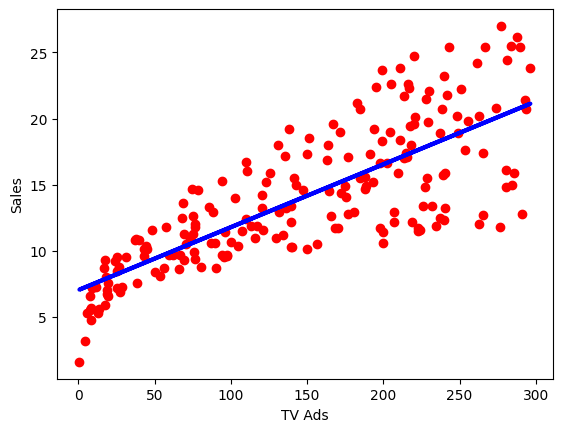

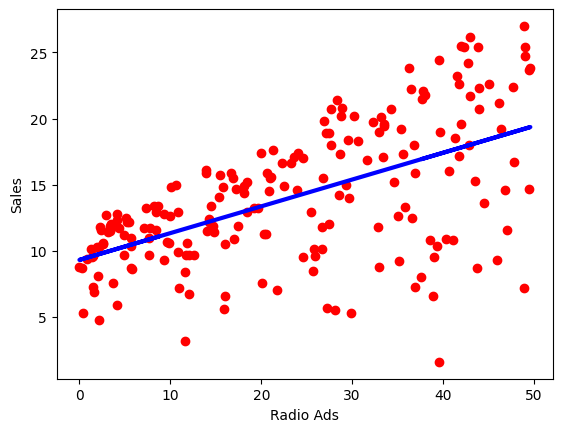

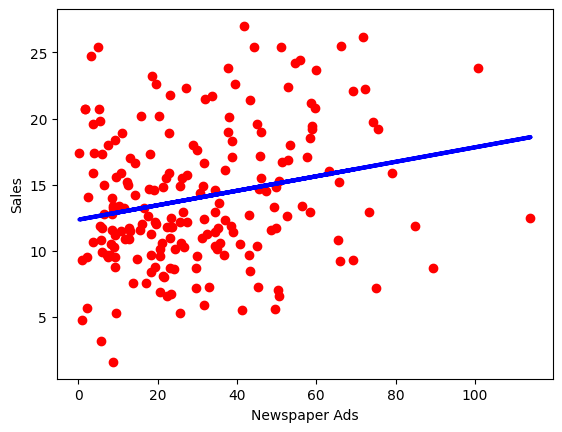

In [ ]:
# Plotting Sales vs Ad_TV and the fitted model prediction
plt.scatter(TV, Sales,  color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='blue', linewidth=3)
plt.show()

# Plotting Sales vs Ad_Radio and the fitted model prediction
plt.scatter(Radio, Sales,  color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='blue', linewidth=3)
plt.show()

# Plotting Sales vs Ad_Newspaper and the fitted model prediction
plt.scatter(Newspaper, Sales,  color='red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='blue', linewidth=3)
plt.show()

* From the plots above, The positive correlation between Sales and TV are the clearest
* On the other hand, the effect of Radio and Newspaper ads on sales cannot be represented by simple linear models

#### **Multiple Linear Regression**


**Training Multiple Linear Model**

In [ ]:
# Training multiple linear regression model
# This model determines the Combinatory effects of 'TV','Radio', and 'Newspaper' Ads ont he sales

mlr_model = linear_model.LinearRegression()
mlr_model.fit(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

LinearRegression()

**Evaluating the Model**

In [ ]:
# Adding a column showing the sales predicted using the Trained Model
Ad_df['Sales_Predicted']  = mlr_model.predict(Ad_df[['TV', 'Radio', 'Newspaper']])

# Adding a column showing the error values between Sales predicted by the model and actual sales
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2
MSE_MLR = Ad_df['Error'].mean()
MSE_MLR

np.float64(2.784126314510936)

In [ ]:
# Using the .score method to get the R^2 value
mlr_model.score(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

0.8972106381789522

* The Mean Square error of the models is 2.78
* The R^2 value for the multiple linear regression comes out to be 89.7% i.e. way better than simple linear regression

**Getting a more detailed model interpretation using Statsmodel library**

In [ ]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.58e-96
Time:                        01:56:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
# Prining out the Parameters
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse)
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

* From the plots above, it can be seen that the simple linear models trained previously yield the same results as that of the lmplot of the seaborn library

#### **Training a Linear Model with Feature Engineering**

- We realize that the newspaper can be omitted from the list of significant features owing to the p-value.
- Let us now run the regression analysis adding a multiplicative feature in it.

**Creating a new feature by combining TV and Radio Data**

In [ ]:
# Creating a New Feature column multiplying 'TV' and 'Radio' column data
Ad_df['TVandRadio'] = Ad_df['TV']*Ad_df['Radio']

In [ ]:
# Removing the sales_predicted and the error column generated earlier
Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [ ]:
# Initializing the Model using the new Features
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          2.92e-144
Time:                        02:11:29   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.0

**Observations**
- We see an increase in the R-square here. However, is this model useful for prediction? Does it predict well for the unseen data? Let us find out!

### **Performance assessment, testing and validation**

**Creating a Train, Test, and Validation set**
- We will split data into three sets, one to train the model, one to validate the model performance (not seen during training) and make improvements, and the last to test the model.

In [26]:
# Importing the library for data splitting
from sklearn.model_selection import train_test_split

In [28]:
# Creating list of original features
features_base = [i for i in Ad_df.columns if i not in ("Sales" , "TVandRadio")]

# Creating a list of features with the Engineered 'Combined' Feature
features_added = [i for i in Ad_df.columns if i not in "Sales"]

# Setting the target variable
target  = 'Sales'

In [29]:
# Data Splitting

# Splitting the original data into Training data and Test data
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

# Splitting the Training data into Training and validation data
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [30]:
# Showing the Dimensions of each split
print(train.shape)
print(validation.shape)
print(test.shape)

(144, 5)
(36, 5)
(20, 5)


* From the results above, the original 200 data entries was segregated into 180 Training data and 20 Testing data
* The 180 Training data points was further split into 144 training data points and 36 validation data

**Training new Linear Models using the Split data**

In [31]:
# Modelling with the original features

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train[features_base], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr.score(train[features_base], train[target]))
se_train = (train[target] - mlr.predict(train[features_base]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
se_val = (validation[target] - mlr.predict(validation[features_base]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9136751192071113
MSE:  2.1091515918225414
********Validation set Metrics**************
R-Squared: 0.8826040407780589
MSE:  3.907338806933477


In [ ]:
# Modelling using the new Features added

mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9580235172472629
MSE:  1.0016155394444397
********Validation set Metrics**************
R-Squared: 0.9795480571242043
MSE:  0.7600527441072137


**Observations**
- We found the R-squared increased as we would expect after adding a feature. Also the error decreased. Let us now fit a regularized model.

### **Regularized Linear Models**

In [33]:
# Displaying the two sets of independent variables to be used for training models
print(features_base)
print(features_added)

['TV', 'Radio', 'Newspaper']
['TV', 'Radio', 'Newspaper', 'TVandRadio']


**Importing the packages**

In [32]:
# Importing Regularization algorithms
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

**Training Regularized Linear Models**

In [34]:
# RIDGE Algorithm

# Initializing Ridge Regularization Algorithm on the extended features
ridge = Ridge()
ridge.fit(train[features_added], train[target])

# Displaying Model Performance on Training set
print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)

# Displaying Model Performance on Validation set
print("********Validation set Metrics**************")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.980663774666347
MSE:  0.472436568318703
********Validation set Metrics**************
R-Squared: 0.9513685915729696
MSE:  1.6186195048121663


In [35]:
# LASSO Algorithm

# Initializing Lasso Regularization Algorithm on the extended features
lasso = Lasso()
lasso.fit(train[features_added], train[target])

# Displaying Model Performance on Training set
print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)

# Displaying Model Performance on Validation set
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9793943044596392
MSE:  0.5034531776977905
********Validation set Metrics**************
R-Squared: 0.9513066524877513
MSE:  1.620681049289026


* From the performance results above, the Ridge algorithm yielded slightly better results

**Predicing Target Variable using Trained Model**

In [36]:
#Let us predict on the unseen data using Ridge

rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.8948507905492602
MSE:  3.3233958597745734
Intercept is 6.96709657488851 and Coefficients are [ 0.01824951  0.04627279 -0.00401197  0.00102511]


#### **Evaluating the model performance using the LooCV and KFold**

In [38]:
# Importing library for model evaluation
from sklearn.model_selection import cross_val_score

In [39]:
# Training cross-validated, Ridge-regularized linear model

ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std()

# note that the same can be set as LooCV if cv parameter above is set to n, i.e, 200.

Mean Score:
0.9649887636257694 

Confidence Interval:


(np.float64(0.9430473456799697), np.float64(0.986930181571569))

* From the results above, the cross-validated score is 0.965 which is significantly higher compared to the previous model
* This indicates that adding a cross-validation step in the model training has significant impacts on the accuracy of the trained models

### **Bootstrapping method**

In [ ]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.47e-42
Time:                        15:28:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

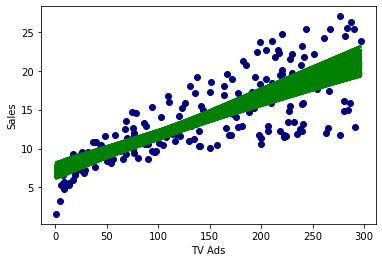

In [ ]:
#Now, let us calculate the slopes a 1000 times using bootstrapping

Slope = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3 = smf.ols(formula= 'Sales ~ TV', data = bootstrap_df).fit()
  Slope.append(lm3.params.TV)

  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3)

plt.scatter(Ad_df['TV'], Ad_df['Sales'],  color=(0,0,0.5))
plt.show()


In [ ]:
# Let's now find out the 2.5 and 97.5 percentile for the slopes obtained
import numpy as np

Slope = np.array(Slope)
Sort_Slope = np.sort(Slope)


Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04126775, 0.05293063])

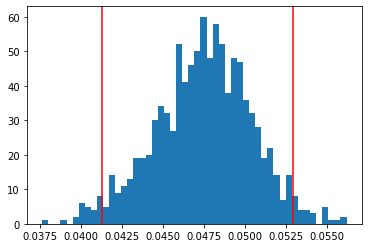

In [ ]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope, 50)
plt.axvline(Slope_limits[0], color = 'r')
plt.axvline(Slope_limits[1], color = 'r')

* The figure shows a normally distributed values of fitted slopes
* This result can also be considered as an illustration of the central limit theorem as the Bootstrapping method merely takes out random samples from the original data
* As we bootstrapped 1000 times, the results of the fitted slope will approach a normal distribution

### **Summary**
* In this study, the Advertisement data was used to train several linear models that predict 'Sales' variable
* From the simple linear models trained, only Sales vs. TV ads yielded a distinct linear correlation
* Besides simple linear models, multiple linear models were also trained which showed improved R^2 values. This indicated that multiple linear models better capture the behavior of the Target variable with respect to the independent variables
* Feature engineering was applied in an attempt to further improve multiple linear model's performance and was seen to yield positive impacts
* Finally, the effects of adding cross-validation and regularization steps in the model training algorithm, on the resulting performance was thoroughly explored.
